In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('housing.csv')
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [11]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: xlabel='median_income', ylabel='Count'>

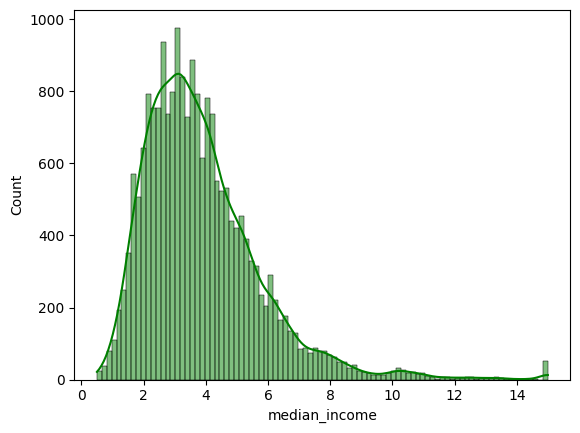

In [17]:
sns.histplot(df['median_income'], kde=True, color='green')

<Axes: xlabel='housing_median_age', ylabel='Count'>

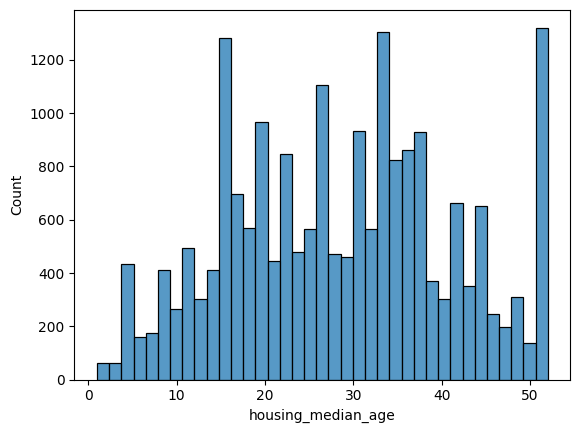

In [20]:
sns.histplot(df['housing_median_age'])

In [39]:
from sklearn.model_selection import train_test_split

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [40]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]
df["income_cat"] = pd.cut(df["median_house_value"],
bins=[0, 100000, 200000, 300000, 400000, np.inf],
labels=[1, 2, 3, 4, 5])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
stratify=df["income_cat"])

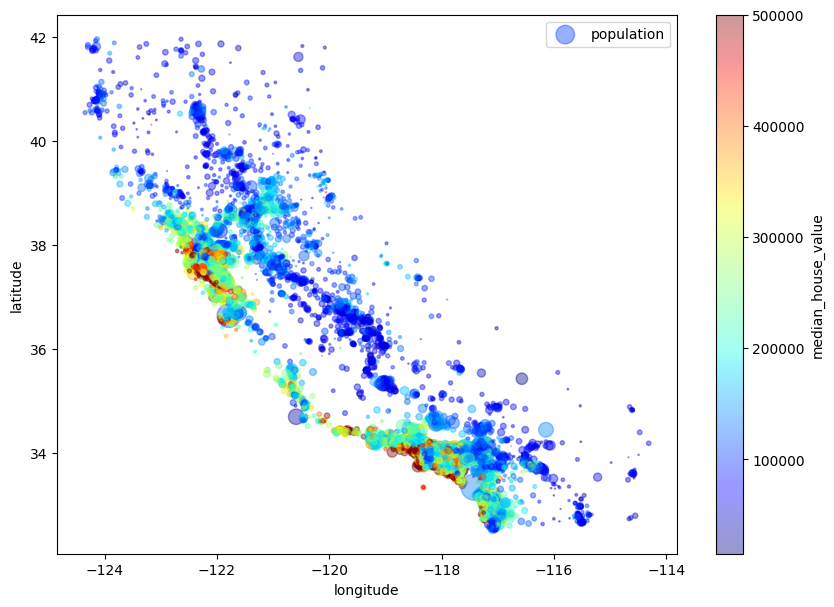

In [45]:
train_set = X_train.copy()
train_set["median_house_value"] = y_train
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=train_set["population"]/100, label="population",figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"),
colorbar=True)
plt.legend()

In [46]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_columns.corr()
print(correlation_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


<Axes: xlabel='median_income', ylabel='median_house_value'>

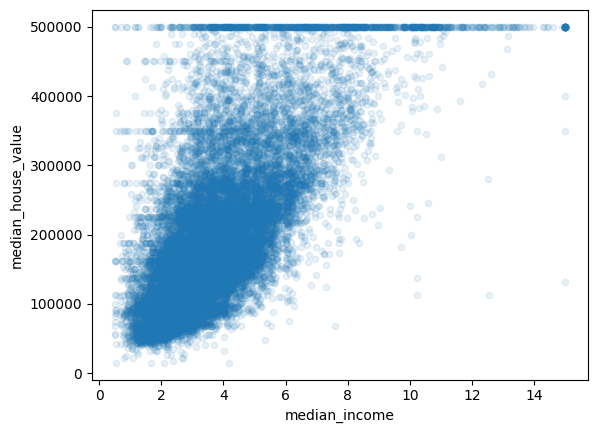

In [47]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

median_house_value     1.000000
median_income          0.688075
income_households      0.352662
rooms_per_household    0.151948
total_rooms            0.134153
housing_median_age     0.105623
households             0.065843
total_bedrooms         0.049686
population            -0.024650
longitude             -0.045967
latitude              -0.144160
Name: median_house_value, dtype: float64


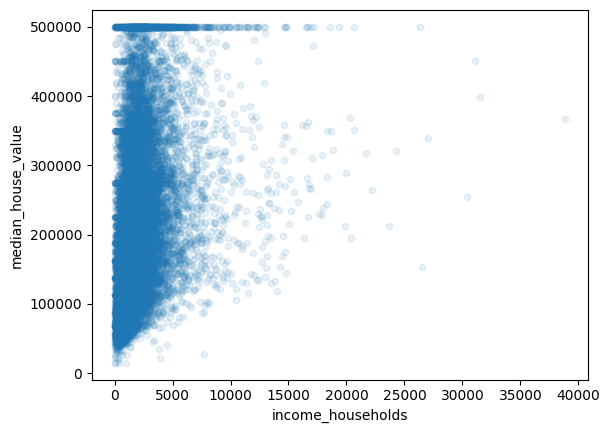

In [50]:
# Combine 'median_income' and 'households'
df["income_households"] = df["median_income"] * df["households"]

numerical_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_columns.corr()
print(correlation_matrix["median_house_value"].sort_values(ascending=False))
df.plot(kind="scatter", x="income_households", y="median_house_value", alpha=0.1)
plt.show()

In [52]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

total_bedrooms    207
dtype: int64


In [72]:
h=df
h.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,income_households,rooms_per_household,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5,1048.9752,6.984127,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4,9446.9932,6.238137,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4,1284.5598,8.288136,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,1235.8389,5.817352,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4,996.1658,6.281853,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,514.8990,5.045455,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,291.4752,6.114035,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,736.1000,5.205543,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,651.6528,5.329513,False,True,False,False,False


In [78]:
from sklearn.preprocessing import OneHotEncoder
df1=pd.read_csv('housing.csv')
hc=df1[["ocean_proximity"]]
encoder=OneHotEncoder()
hc_encoded=encoder.fit_transform(hc).toarray()
hc_1hot_df = pd.DataFrame(hc_encoded, columns=encoder.get_feature_names_out(hc.columns))
hc_1hot_df.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


Feature scaling is crucial in machine learning for several reasons, particularly when using algorithms that are sensitive to the scale of features.  Here's a breakdown of its importance:

1. **Improved Performance of Distance-Based Algorithms:**

2. **Faster Convergence of Gradient Descent:**

3. **Improved Regularization:**

4. **Better Interpretation of Coefficients:**

5. **Numerical Stability:**


In [83]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Custom transformer to add engineered attributes
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # Assumes X is a NumPy array with the following columns:
        # total_rooms (index 3), total_bedrooms (index 2), population (index 4), households (index 5)
        rooms_per_household = X[:, 3] / X[:, 5]
        population_per_household = X[:, 4] / X[:, 5]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 2] / X[:, 3]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Identify numerical and categorical columns
num_attribs = df1.drop("ocean_proximity", axis=1).columns  # All numeric columns
cat_attribs = ["ocean_proximity"]

# Build numerical pipeline: impute missing values, add new attributes, then scale
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# Build the full pipeline combining numerical and categorical processing
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

# Process the dataset using the pipeline
housing_prepared = full_pipeline.fit_transform(housing)
print("Shape of processed data:", housing_prepared.shape)

NameError: name 'SimpleImputer' is not defined